In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn import tree

In [7]:
#%pip install matplotlib

In [8]:
path = r'C:\Users\patro\OneDrive\Education\Master of Science in Business Analytics (MSBA)\Courses\Phyton\Data\Decision_Tree_ Dataset.csv'
balance_data = pd.read_csv(path, header=0)

In [9]:
print("Dataset Length: ", len(balance_data))
print("Dataset Shape: ", balance_data.shape)

Dataset Length:  1000
Dataset Shape:  (1000, 6)


In [10]:
print(balance_data.head())

   Initial payment  Last payment  Credit Score  House Number    Sum Result
0              201         10018           250          3046  13515    yes
1              205         10016           395          3044  13660    yes
2              257         10129           109          3251  13746    yes
3              246         10064           324          3137  13771    yes
4              117         10115           496          3094  13822    yes


In [11]:
# Split the dataset into features and target variable
X = balance_data.loc[:, ['Initial payment', 'Last payment', 'Credit Score', 'House Number']] # Features
Y = balance_data.loc[:, ['Result']] # Target variable


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Function to perform training with Entropy
clf_entropy= DecisionTreeClassifier(criterion = "entropy", random_state= 100
    , max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
# Function to make Predictions
y_pred_en= clf_entropy.predict(X_test)
print(y_pred_en)

['yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'No' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes'
 'No' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'No'
 'yes' 'yes' 'yes' 'No' 'No' 'No' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'yes' 'No' 'No' 'No' 'No' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No' 'yes'
 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'yes' 'No' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No'
 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'No' 'No'
 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'N

In [13]:
print("Accurace is", accuracy_score(y_test, y_pred_en)*100)

Accurace is 93.66666666666667


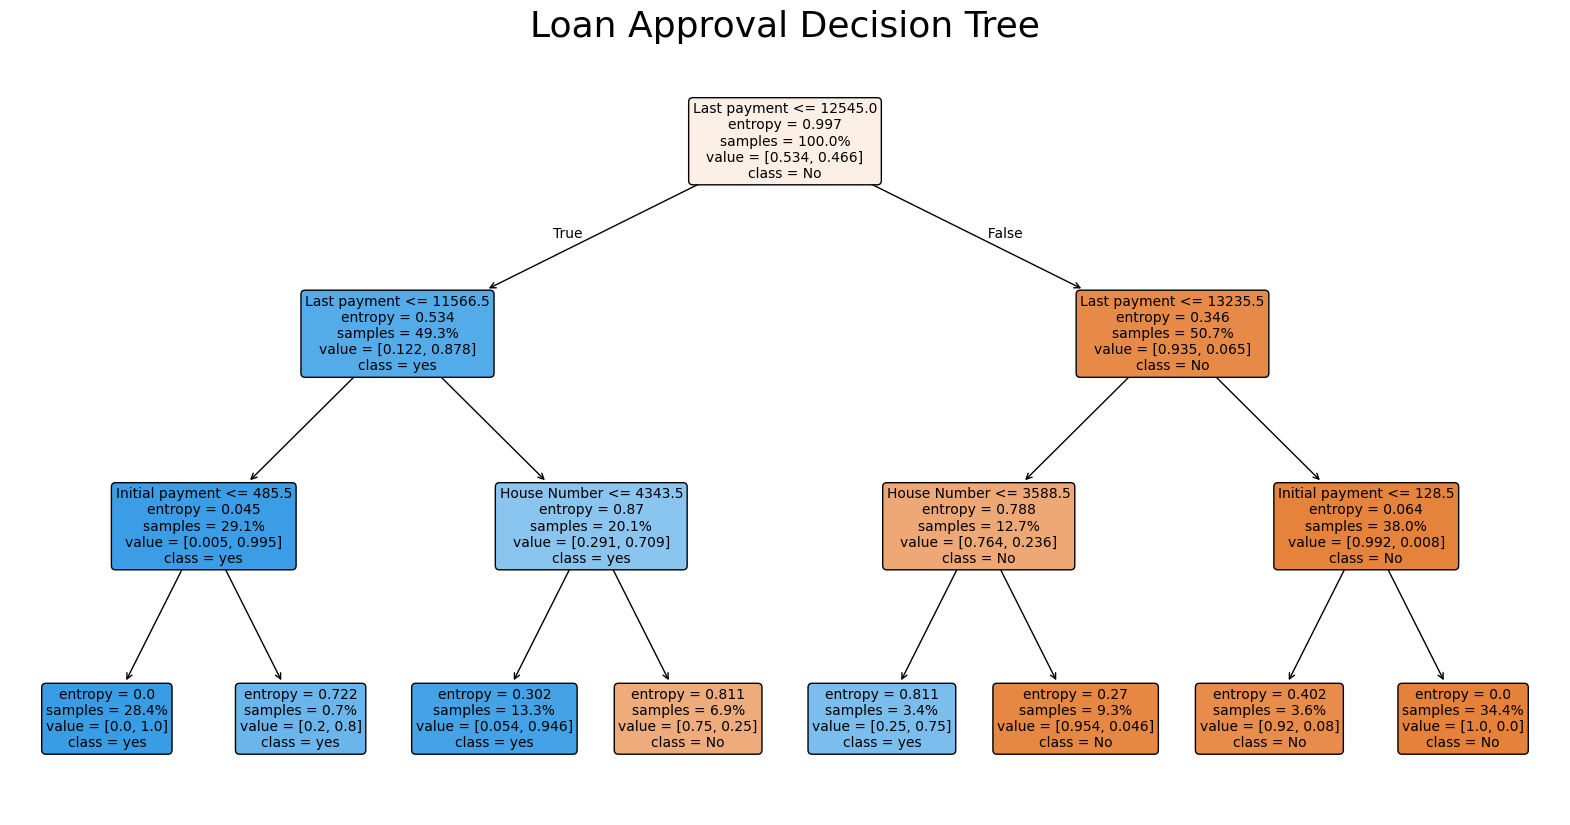

In [17]:
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(clf_entropy, 
          filled=True,        # Color nodes by their majority class
          feature_names=X.columns,  # Use your feature names
          class_names=clf_entropy.classes_, # Use your class names (e.g., ['Denied', 'Approved'])
          rounded=True,       # Rounded node corners
          proportion=True,    # Show proportions of classes in nodes instead of pure counts
          fontsize=10)        # Adjust font size for better readability

plt.title("Loan Approval Decision Tree", fontsize=26)
plt.show()

In [ ]:
#%pip install graphviz


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\patro\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


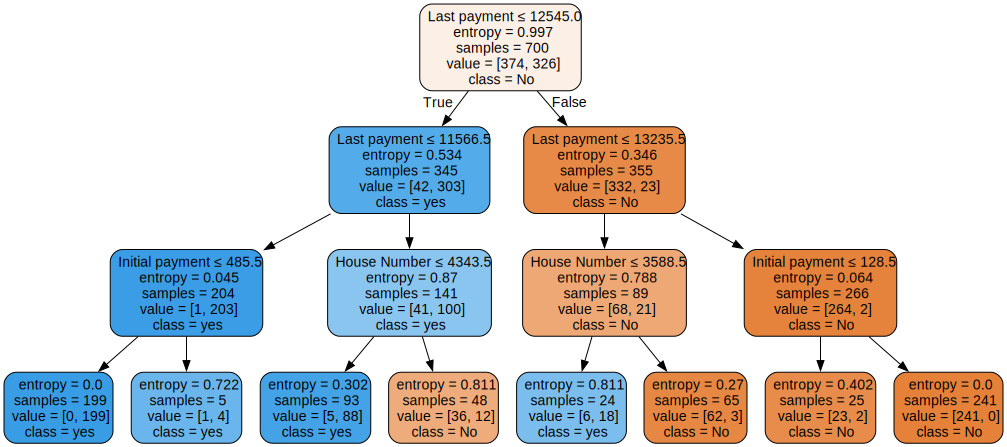

In [16]:
import graphviz
from sklearn.tree import export_graphviz

# Export to Graphviz format
dot_data = export_graphviz(clf_entropy,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=clf_entropy.classes_,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create and render the graph
graph = graphviz.Source(dot_data)
graph.render("loan_decision_tree", format='png', cleanup=True)  # Saves as PNG
graph  # Display in Jupyter notebook